In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_m = pd.DataFrame(pd.read_csv(mouse_drug_data_to_load))
df_c = pd.DataFrame(pd.read_csv(clinical_trial_data_to_load))

# Combine the data into a single dataset
df = pd.merge(df_m, df_c,how = "outer", right_on = "Mouse ID", left_on = "Mouse ID")


# Display the data table for preview
df


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_group = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df01 = pd.DataFrame(df_group)

# Preview DataFrame
df01

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_se = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df02 = pd.DataFrame(df_se)

# Preview DataFrame
df02

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
df03 = df01.unstack(level = "Drug")
# Preview that Reformatting worked
df03

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# plotting function 
# function to plot data 
def ploter(data, var, plot_type):
    plot_cols = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
    if plot_type == "bar":
        plt.figure(figsize = (15,10))
        height = data
        bar_plot = plt.bar(x = plot_cols, height = height, width = -1, color = ('green','red','red','red'), align = 'edge')
        plt.grid()
        plt.yticks(range(-20, 80, 20))
        return bar_plot
    else:
        x = data.index
        params_Inf = {'color':'blue','fmt':"--^",'marker':"^"}
        params_Ket = {'color':'green','fmt':"--s",'marker':'s'}
        params_Pla = {'color':'black','fmt':'--d','marker':'d'}
        params_Cap = {'color':'red','fmt':'--o','marker':'o'}
        plt.figure(figsize = (15,10))
        for col in plot_cols:
            if col == "Infubinol":
                params = params_Inf
            elif col == "Ketapril":
                params = params_Ket
            elif col == "Placebo":
                params = params_Pla
            else: 
                params = params_Cap
            if plot_type == "error":
                y = data[var+ '_mean'][col]
                errs = data[var +'_error'][col]
                plot = plt.errorbar(x,y,errs, color = params['color'], fmt = params['fmt'],
                                    ms = 6, label = col)
                grid = 'y'
            elif plot_type == "line":
                y = data[var][col]
                plot = plt.plot(x,y, color = params['color'], ls = ":",
                                marker = params['marker'], ms = 6, label = col)
                grid = 'both'
        plt.legend()
        plt.grid(axis = grid)
        return plot

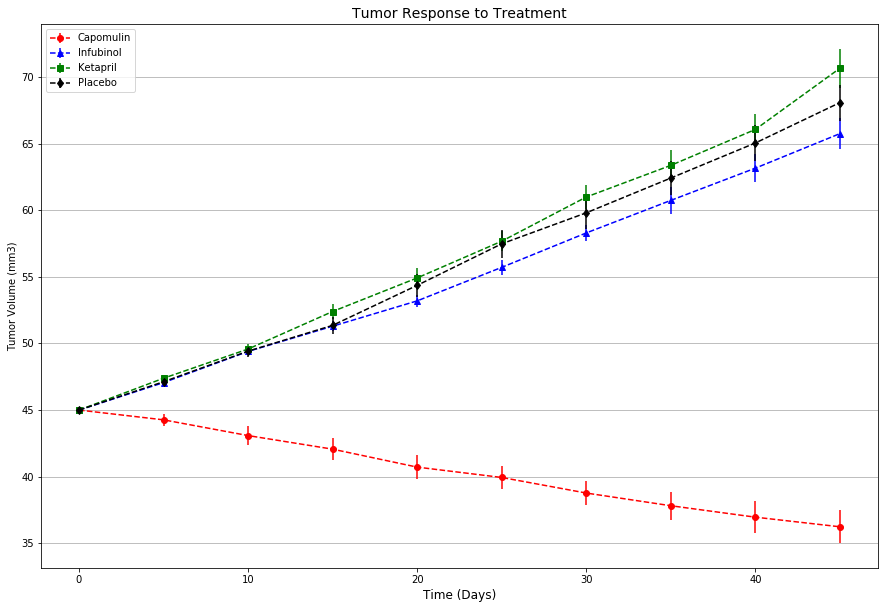

In [39]:
# Generate the Plot (with Error Bars)
plot_cols = ('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
df_plot = df03.loc[:, df03.columns.get_level_values(1).isin(plot_cols)]
df_error = df02.loc[df02.index.get_level_values(0).isin(plot_cols),:].unstack(level = "Drug")
df_plot1 = df_plot.merge(df_error, left_on = df_error.index, right_on = df_plot.index, \
                         suffixes = ("_mean", "_error"))
df_plot1 = df_plot1.set_index(df_plot.index).drop("key_0", axis = 1) 

ploter(df_plot1,'Tumor Volume (mm3)', 'error')
plt.title("Tumor Response to Treatment", size = 14)
plt.xlabel("Time (Days)", size = 12)
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("treatment.png")
# show the fig 
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_group_site = df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].mean()

# Convert to DataFrame
df04 = pd.DataFrame(df_group_site)

# Preview DataFrame
df04

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_group_site1 = df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()

# Convert to DataFrame
df05 = pd.DataFrame(df_group_site1).unstack(level = "Drug")

# Preview DataFrame
df05

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
df06 = df04.unstack(level = "Drug")
# Preview that Reformatting worked
df06

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


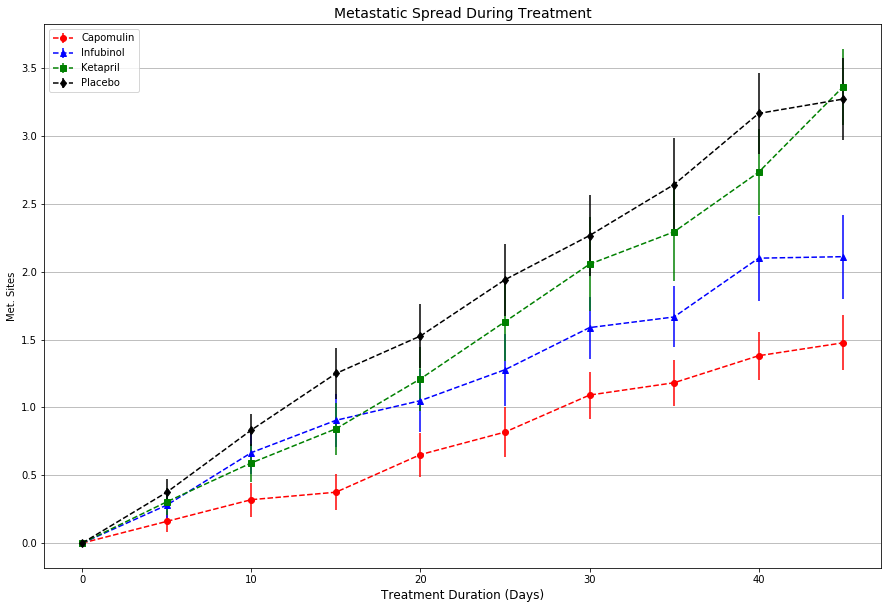

In [37]:
# Generate the Plot (with Error Bars)
df_plot_meta = df06.loc[:, df06.columns.get_level_values(1).isin(plot_cols)]
df_error_meta = df05.loc[:,df05.columns.get_level_values(1).isin(plot_cols)]
df_plot2 = df_plot_meta.merge(df_error_meta, left_on = df_error_meta.index, right_on = df_plot_meta.index, suffixes = ("_mean", "_error"))
df_plot2 = df_plot2.set_index(df_plot_meta.index).drop("key_0", axis = 1)

ploter(df_plot2, "Metastatic Sites", 'error')
plt.title("Metastatic Spread During Treatment", size = 14)
plt.xlabel("Treatment Duration (Days)", size = 12)
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("spread.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_group_mice = df.groupby(["Drug", "Timepoint"])['Mouse ID'].count()

# Convert to DataFrame
df07 = pd.DataFrame(df_group_mice)

# Preview DataFrame
df07

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
df08 = df07.unstack(level = "Drug")
# Preview the Data Frame
df08

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   
25               22       18        18       19       18      17       14   
30               22       16        17       18       15      15       13   
35               22       14        12       17       15      14       10   
40               21       14        10       15       15      12        9   
45               21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


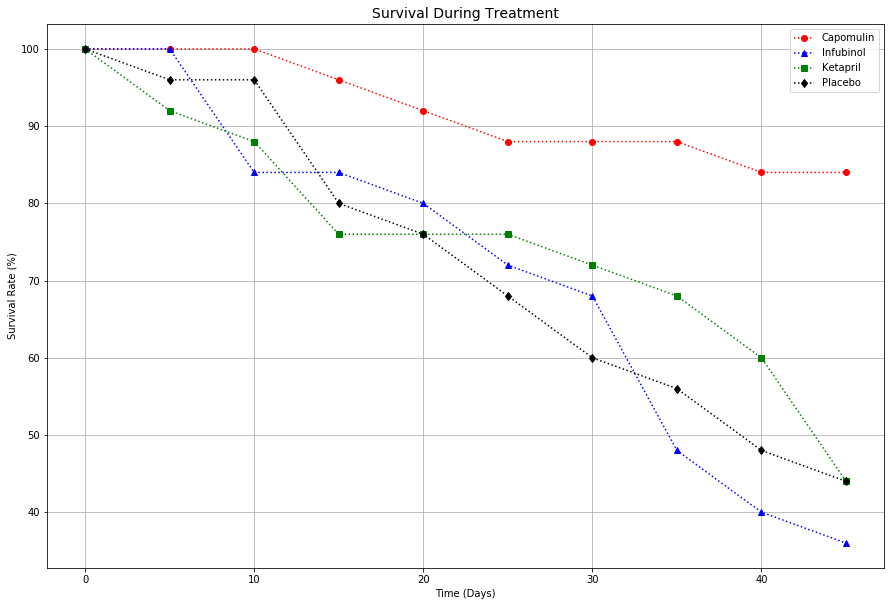

In [36]:
# Generate the Plot (Accounting for percentages)
df_mpercent = (df08.loc[:,:]/25)*100
df_plot3 = df_mpercent.loc[:, df_mpercent.columns.get_level_values(1).isin(plot_cols)]
ploter(df_plot3, 'Mouse ID', 'line')
plt.title("Survival During Treatment", size = 14)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
# Save the Figure
plt.savefig("survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug
df09 = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
df10 = pd.DataFrame(df09).unstack(level = "Drug")
percent_change = ((df10.loc[45,:]/df10.loc[0,:])-1)*100
pchange_values = percent_change.values
# Display the data to confirm
percent_change

                    Drug     
Tumor Volume (mm3)  Capomulin   -19.475303
                    Ceftamin     42.516492
                    Infubinol    46.123472
                    Ketapril     57.028795
                    Naftisol     53.923347
                    Placebo      51.297960
                    Propriva     47.241175
                    Ramicane    -22.320900
                    Stelasyn     52.085134
                    Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

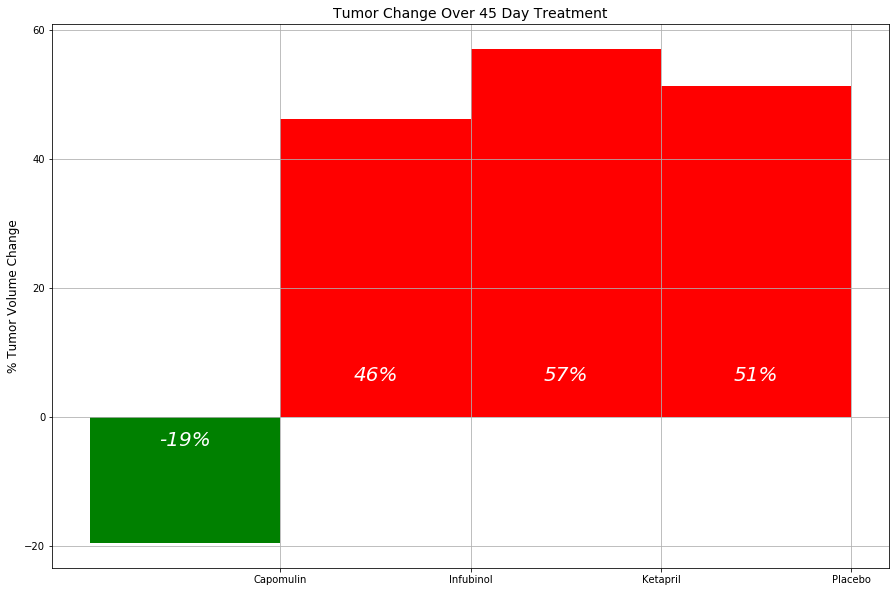

In [35]:
# Store all Relevant Percent Changes into a Tuple
plot_pchange = pchange_values[[0,2,3,5]]
data_plot4 = tuple(plot_pchange)
bar_labels = [(str(value) + '%') for value in [int(value) for value in \
                                               (pchange_values[[0,2,3,5]].round())]]

# Orient widths. Add labels, tick marks, etc. 
bar_plot = ploter(data_plot4, 'idx', 'bar')
plt.yticks(range(-20, 80, 20))
plt.title('Tumor Change Over 45 Day Treatment', size = 14)
plt.ylabel('% Tumor Volume Change', size = 12)


# Use functions to label the percentages of changes
def labeler(rects):
    for idx,rect in enumerate(bar_plot):
        height= 5
        if idx == 0 :
            height = -5
        plt.text(rect.get_x() + rect.get_width()/2., height, bar_labels[idx],
                 ha='center', va='bottom', rotation=0, color = 'white', 
                 size = 20, style = ('italic'))

# Call functions to implement the function calls
labeler(bar_plot)


# Save the Figure
plt.savefig("change.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)